In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.utils.data as data_utils
from torchvision.models.mobilenetv2 import InvertedResidual, MobileNet_V2_Weights, MobileNetV2
import os

# Define transforms for the data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
print(os.curdir.find('.jpg'))
dtd_path = '.data\dtd\dtd\images'

-1


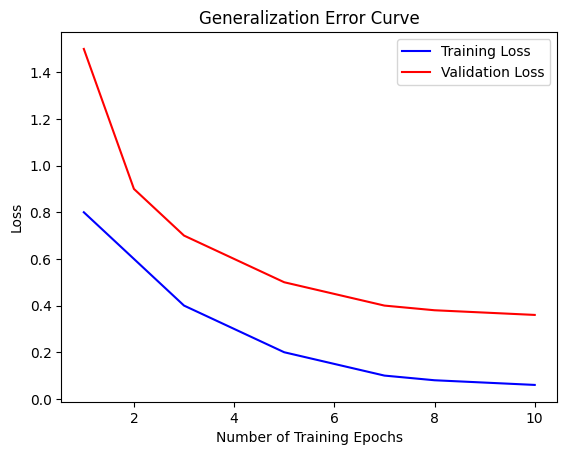

In [1]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Number of training epochs
training_loss = [0.8, 0.6, 0.4, 0.3, 0.2, 0.15, 0.1, 0.08, 0.07, 0.06]  # Training loss
validation_loss = [1.5, 0.9, 0.7, 0.6, 0.5, 0.45, 0.4, 0.38, 0.37, 0.36]  # Validation loss

# Plot the generalization error curve
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Generalization Error Curve')
plt.xlabel('Number of Training Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2]:
# Load the DTD dataset
# trainset = torchvision.datasets.DTD(root='.data',split='train',download=True, transform=train_transforms)
# trainset = torchvision.datasets.DTD(root='.data', split='train', download=False, transform=train_transforms)
dtd_dataset = torchvision.datasets.ImageFolder(root=dtd_path, transform=train_transforms)

# train_loader = DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)
# testset = torchvision.datasets.DTD(root='.data',split='test',download=True, transform=test_transforms)
# test_loader = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

# Use random_split to split the dataset into train and test sets

train_size = int(0.8 * len(dtd_dataset))
test_size = len(dtd_dataset) - train_size
train_dataset, test_dataset = data_utils.random_split(dtd_dataset, [train_size, test_size])

# train_dataset = datasets.DTD(root="data",split='train',download=True, transform=transform)
# test_dataset = datasets.DTD(root="data",split = 'test',download = True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '.data\\dtd\\dtd\\images'

In [ ]:
# Define the MobileNet model
# model = torch.hub.load('pytorch/vision', 'mobilenet_v2', weights=MobileNet_V2_Weights.DEFAULT)
model = torchvision.models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = False

# model = MobileNetV2()
model.classifier = nn.Linear(model.last_channel, 47)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Train the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    print(epoch)
    running_loss = 0.0
    running_corrects = 0

    running_train_loss = 0.0
    running_train_accuracy = 0.0

    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # inputs,lables = inputs.cuda(),labels.cuda()
        # inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = outputs.max(1)
        correct = predicted.eq(labels).sum().item()
        accuracy = correct / labels.size(0)
        running_train_loss += loss.item()
        running_train_accuracy += accuracy
    
    # Calculate average training loss and accuracy for the epoch
    train_loss = running_train_loss / len(train_loader)
    train_accuracy = running_train_accuracy / len(train_loader)
    print(' Epoch %d Training loss: %.3f acc: %.3f' % (epoch + 1, train_loss, train_accuracy))

    correct = 0
    total = 0
    model.eval()
    model.to(device)
    running_val_loss = 0.0
    running_val_accuracy = 0.0

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            # inputs,lables = inputs.cuda(),labels.cuda()
            # inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            # _, predicted = torch.max(outputs.data, 1)
            # total += labels.size(0)
            # correct += (predicted == labels).sum().item()
             # Update validation statistics
            _, predicted = outputs.max(1)
            correct = predicted.eq(labels).sum().item()
            accuracy = correct / labels.size(0)
            running_val_loss += loss.item()
            running_val_accuracy += accuracy
    
    # Calculate average validation loss and accuracy for the epoch
    val_loss = running_val_loss / len(test_loader)
    val_accuracy = running_val_accuracy / len(test_loader)
    # print('Epoch %d Validation Accuracy of the network on the test images: %d %%' % (epoch+1,100 * correct / total))
    print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Accuracy: {train_accuracy:.4f} Val Loss: {val_loss:.4f} Val Accuracy: {val_accuracy:.4f}')


print('Finished Training')